# Assignment 5 Solutions

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as spi
%matplotlib inline

**QUESTION 1**

In [2]:
def riemann_sum(y,x,method='left'):
    '''
    Compute the Riemann sum given the arrays of x and y values.
    
    INPUT:
    x - array of x values
    y - array, coresponding array of y values of the integrand
    method - string, compute Riemann sum with left endpoints if method == 'left' or right endpoints if method == 'right'
    
    RETURNS:
    The Riemann sum defined by the partition x using left or right endpoints.
    '''
    n = len(x)
    if method == 'left':
        return sum([ y[i-1]*(x[i] - x[i-1]) for i in range(1,n) ])
    elif method == 'right':
        return sum([ y[i]*(x[i] - x[i-1]) for i in range(1,n) ])

In [3]:
x = np.linspace(0,np.pi,1000)
y = np.sin(x)
riemann_sum(y,x)

1.9999983517708495

In [4]:
riemann_sum(y,x,method='right')

1.9999983517708528

**QUESTION 2**

In [5]:
def f(x):
    return x * np.arcsin(x) / (1 + x**2)

approximation, error = spi.quad(f,0,1)
print(approximation)

0.24873117470336062


In [6]:
true_value = np.pi/2*np.log(2*np.sqrt(2)/(1 + np.sqrt(2)))
print(true_value)

0.248731174703


In [7]:
abs(approximation - true_value) < error

True

**QUESTION 3**

In [8]:
def fresnel(alpha=1,b=5,trig_fun='sin'):
    "Plot the Fresnel sine/cosine function with parameter alpha over the interval [0,b]."
    if trig_fun == 'sin':
        def f(y,t):
            return np.sin(alpha * t**2)
    elif trig_fun == 'cos':
        def f(y,t):
            return np.cos(alpha * t**2)
    
    t = np.linspace(0,b,200*alpha)
    y = spi.odeint(f,0,t)
    plt.plot(t,y)
    plt.show()

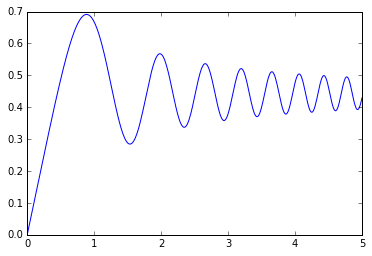

In [9]:
fresnel(2,trig_fun='cos')

**QUESTION 4**

In [10]:
def trig_ode(alpha=1,beta=1,y0=0,tf=10):
    "Plot and return the solution of the ODE y' = sin(alpha*y) + cos(beta*t) with y(0)=y0 over the interval [0,10]."
    def f(y,t):
        return np.sin(alpha*y) + np.cos(beta*t)
    t = np.linspace(0,tf,500)
    y = spi.odeint(f,y0,t)
    plt.plot(t,y)
    plt.show()
    return (y,t)

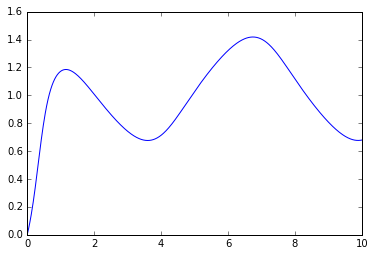

In [11]:
y,t = trig_ode(3)